# Exercise 3

Diogo Gomes nº26843

### Use the Univariate_analysis.ipynb and the dataset in EFIplus_medit.zip to plot strip plots, histograms and boxplots (and any additional plot that you feel appropriate) of **Annual Mean Temperature (temp_ann) at each of the four catchments with the highest number of fish sampling sites**. Try to fit each type of graph in a single window (4 graphs per window - check how to do it in previous examples I gave, which are available in github).

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import, visualize and summarize table properties

In [112]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [113]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [114]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [115]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

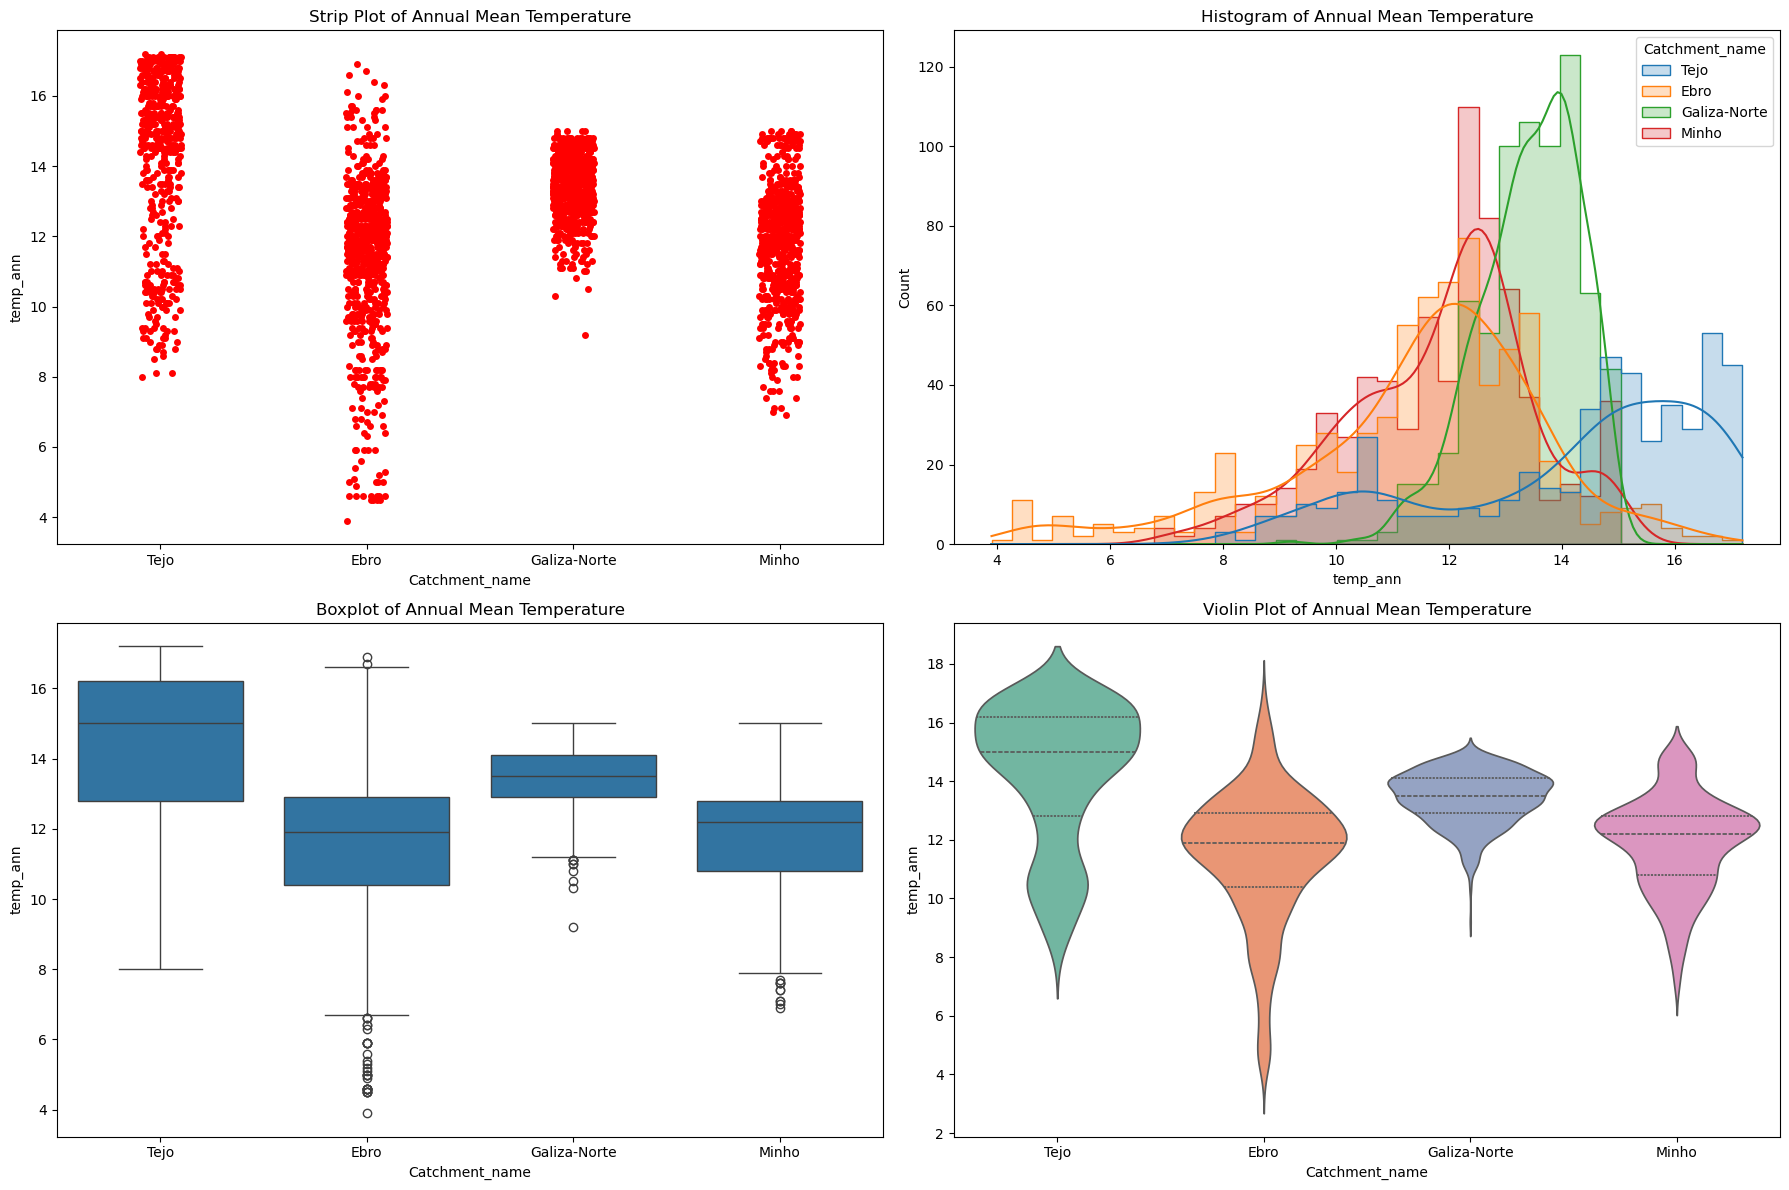

In [116]:
# top four catchments with the highest number of fish sampling sites
top_catchments = df['Catchment_name'].value_counts().nlargest(4).index

# filter dataset for the top catchments
filtered_df = df[df['Catchment_name'].isin(top_catchments)]

# creating a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# strip plot
sns.stripplot(data=filtered_df, x='Catchment_name', y='temp_ann', color='red', ax=axes[0, 0], jitter=True)
axes[0, 0].set_title("Strip Plot of Annual Mean Temperature")

# histogram
sns.histplot(data=filtered_df, x='temp_ann', hue='Catchment_name', element="step", ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of Annual Mean Temperature")

# boxplot
sns.boxplot(data=filtered_df, x='Catchment_name', y='temp_ann', ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Annual Mean Temperature")

# violin plot 
sns.violinplot(data=filtered_df, x='Catchment_name', y='temp_ann', hue='Catchment_name', ax=axes[1, 1], inner='quartile', palette="Set2", legend=False)
axes[1, 1].set_title("Violin Plot of Annual Mean Temperature")

plt.tight_layout()
plt.show()

### Question: Have a deeper look at the three types of plots and evaluate the pros and cons of each type as univariate visualizations.
#### Plot 1
On the up side the plot is easily understandable, making it clear which category has bigger or smaller temp_ann values and how disperse they are. However, it doesn't provide much information about outliers, standard deviasions or means of each category. Making it more difficult to analyze precisely each category, specially if they were all very similar to each other.

#### Plot 2
On the up side this plot provides a lot of information, like the distribuition of mean_temp across the different categories through bars and also trending lines. On the down side it is too dense, packing too much information in a limited amount of space. For example, it's quite difficult to distinguish "Ebro" and "Minho" unequivocally. It also doesn't provide information about the mean, stand deviation and outliers.

#### Plot 3
On the up side it provides a clear view of the data, with detail and information about the mean, stand deviation and outliers. But unfortunately it doesn't provide information on the distribuition of the data points.

### I also challenge you to construct a plot that shows how the mean value of temp_ann varies with the size of random samplings of sites. Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show how many samples will we need to have a good estimate of the population mean

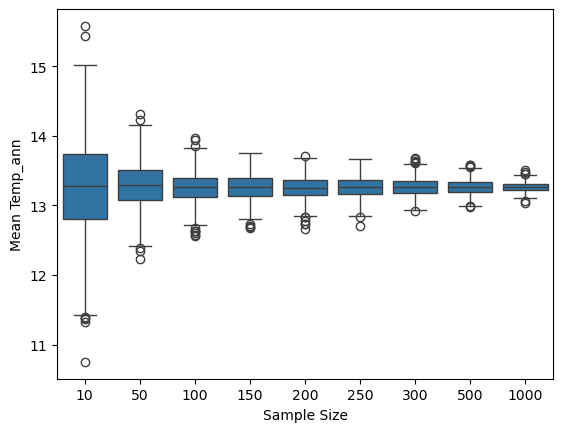

In [119]:
means = []
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
all_sample_means = []  

for size in sample_sizes:
    sample_means = []
    for _ in range(1000):  
        sample = df['temp_ann'].sample(n=size, replace=True)
        mean_value = sample.mean()
        sample_means.append(mean_value)
        all_sample_means.append((size, mean_value))  
    means.append(np.mean(sample_means))

df_means = pd.DataFrame(all_sample_means, columns=["Sample Size", "Mean Temp_ann"])

# boxplot
sns.boxplot(data=df_means, x="Sample Size", y="Mean Temp_ann")
axes[0, 1].set_title('Distribution of Sample Means')
axes[0, 1].set_xlabel('Sample Size')
axes[0, 1].set_ylabel('Mean Temp_ann')

plt.show()